In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.shape

(1460, 81)

In [4]:
df_test.shape

(1459, 80)

In [5]:
#df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<12.5)].index)
#df_train = df_train.drop(df_train[(df_train['LotArea']>150000)].index)
#df_train = df_train.drop(df_train[(df_train['GarageArea']>1200) & (df_train['SalePrice']<12.5)].index)

In [6]:
list0 = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu",'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']

for i in list0:
    df_train[i] = df_train[i].fillna("None")
    df_test[i] = df_test[i].fillna("None")

In [7]:
list1 = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','MasVnrArea','GarageYrBlt','GarageCars','GarageArea']

for i in list1:
    df_train[i] = df_train[i].fillna(0)
    df_test[i] = df_test[i].fillna(0)

In [8]:
list2 = ['MSZoning','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']

for i in list2:
    df_train[i] = df_train[i].fillna(df_train[i].mode()[0])
    df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

In [9]:
pd.concat([df_train['Neighborhood'],df_train['LotFrontage']],axis=1)

,Neighborhood,LotFrontage
0,CollgCr,65.0
1,Veenker,80.0
2,CollgCr,68.0
3,Crawfor,60.0
4,NoRidge,84.0
5,Mitchel,85.0
6,Somerst,75.0
7,NWAmes,NaN
8,OldTown,51.0
9,BrkSide,50.0


In [10]:
#LotFrontageはエイムスの都市内の近域と関係があると考えられる。
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [11]:
df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [12]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

In [13]:
for i in range(df_train.shape[1]):
    if df_train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(df_train.iloc[:,i].values) + list(df_test.iloc[:,i].values))
        df_train.iloc[:,i] = lbl.transform(list(df_train.iloc[:,i].values))
        df_test.iloc[:,i] = lbl.transform(list(df_test.iloc[:,i].values))

In [14]:
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

In [15]:
del df_train['Utilities']

In [16]:
del df_test['Utilities']

In [17]:
#df_train = df_train.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'],axis=1)

In [18]:
#df_test = df_test.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'],axis=1)

In [19]:
df_train['TotalBath'] = df_train['FullBath'] + df_train['HalfBath'] + df_train['BsmtFullBath'] + df_train['BsmtHalfBath']

In [20]:
df_test['TotalBath'] = df_test['FullBath'] + df_test['HalfBath'] + df_test['BsmtFullBath'] + df_test['BsmtHalfBath']

In [21]:
#df_train = df_train.drop(['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath'],axis=1)
#df_test = df_test.drop(['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath'],axis=1)

In [22]:
df_train['TotalPorch'] = df_train['OpenPorchSF'] + df_train['3SsnPorch'] + df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF']

In [23]:
df_test['TotalPorch'] = df_test['OpenPorchSF'] + df_test['3SsnPorch'] + df_test['EnclosedPorch'] + df_test['ScreenPorch'] + df_test['WoodDeckSF']

In [24]:
#df_train = df_train.drop(['OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF'],axis=1)
#df_test = df_test.drop(['OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF'],axis=1)

In [25]:
df_train['BuiltYear'] = 2018 - df_train['YearBuilt']
df_train['GarageYear'] = 2018 - df_train['GarageYrBlt']
df_train['SoldYear'] = 2018 - df_train['YrSold']
df_test['BuiltYear'] = 2018 - df_test['YearBuilt']
df_test['GarageYear'] = 2018 - df_test['GarageYrBlt']
df_test['SoldYear'] = 2018 - df_test['YrSold']

In [26]:
df_train.shape

(1460, 86)

In [27]:
df_test.shape

(1459, 85)

In [28]:
df_train.shape

(1460, 86)

In [29]:
df_test.shape

(1459, 85)

In [30]:
train_ID = df_train['Id']
test_ID = df_test['Id']

y = df_train['SalePrice']
X = df_train.drop(['Id','SalePrice'],axis=1)
X_test = df_test.drop('Id',axis = 1)
X1 = pd.concat([X,X_test])

In [31]:
X_train = X1.iloc[:df_train.shape[0],:]
X_test = X1.iloc[df_train.shape[0]:,:]

Training done using Random Forest


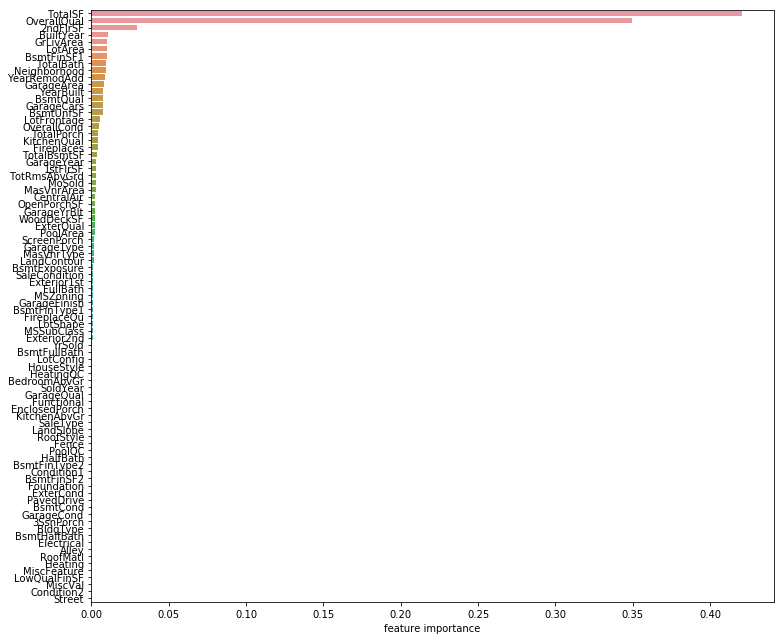

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train,y)
print("Training done using Random Forest")
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [33]:
x_train = X_train.iloc[:,ranking[:30]]
X_test = X_test.iloc[:,ranking[:30]]

In [34]:
X_test.shape

(1459, 30)

In [35]:
x_train.shape

(1460, 30)

In [36]:
ntrain = df_train.shape[0]
train = X1[:ntrain]
test = X1[ntrain:]
X = train.loc[:, train.columns != 'SalePrice']

In [37]:
y.shape

(1460,)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
X1_train, X1_test, y1_train, y1_test = train_test_split(x_train, y, test_size=0.3, random_state=1234)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
lasso = Lasso()
rf = RandomForestRegressor()
en = ElasticNet()
lr = LogisticRegression()

In [42]:
#グリッドサーチ用パラメータの設定
lasso_parameters = {'alpha':[0.1, 0.5, 1]}
rf_parameters= {'n_estimators':[100, 500, 2000], 'max_depth':[3, 5, 10]}
en_parameters = {'alpha':[0.05,0.1,0.5], 'l1_ratio':[0.3,0.5,0.8]}
lr_parameters = {'C':[0.01,0.05,0.1]}
#グリッドサーチ
lasso_gs = GridSearchCV(lasso, lasso_parameters)
lasso_gs.fit(X1_train,y1_train)
rf_gs = GridSearchCV(rf, rf_parameters)
rf_gs.fit(X1_train,y1_train)
en_gs = GridSearchCV(en, en_parameters)
en_gs.fit(X1_train,y1_train)
lr_gs = GridSearchCV(lr,lr_parameters)
lr_gs.fit(X1_train,y1_train)

C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [43]:
#ロジスティック回帰
y_pred4 = lr_gs.predict(X1_test)
print("ロジスティック回帰：%d"%np.sqrt(mean_squared_error(y1_test, y_pred4)))
#Lasso回帰
y_pred = lasso_gs.predict(X1_test)
print("Lasso回帰:%d"%np.sqrt(mean_squared_error(y1_test, y_pred)))
#ランダムフォレスト
y_pred2 = rf_gs.predict(X1_test)
print("ランダムフォレスト:%d"%np.sqrt(mean_squared_error(y1_test, y_pred2)))
#ElasticNet
y_pred5 = en_gs.predict(X1_test)
print("ElasticNet:%d"%np.sqrt(mean_squared_error(y1_test, y_pred5)))

ロジスティック回帰：49838
Lasso回帰:25930
ランダムフォレスト:24991
ElasticNet:25886


In [44]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(max_depth=5, n_estimators=500, subsample=0.8)
xgb_reg.fit(X1_train,y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [45]:
y_pred3 = xgb_reg.predict(X1_test)
print("xgboost:%d"%np.sqrt(mean_squared_error(y1_test, y_pred3)))

xgboost:23764


In [46]:
lasso = Lasso(normalize=True, random_state=123, max_iter=10000)
lasso.fit(X1_train,y1_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=True, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
y_pred4 = lasso.predict(X1_test)
print("Lasso:%d"%np.sqrt(mean_squared_error(y1_test, y_pred4)))

Lasso:25907


In [48]:
y_stack = y_pred3*(1/3) + y_pred3*(1/3) + y_pred2*(1/3)
print("Stacking:%d"%np.sqrt(mean_squared_error(y1_test, y_stack)))

Stacking:23629


In [51]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = MinMaxScaler()
X_train_svr = scaler.fit_transform(X1_train)
X_test_svr = scaler.transform(X1_test)
svr = svm.SVR(C=1e6,epsilon=0.2,kernel='rbf')
svr.fit(X_train_svr, y1_train)
y_pred = svr.predict(X_test_svr)
print("SVRでのRMSE:%d"%np.sqrt(mean_squared_error(y1_test, y_pred)))

SVRでのRMSE:21573


C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [56]:
y_stack = y_pred3*(1/5) + y_pred3*(1/5) + y_pred2*(1/5) + y_pred5*(1/5)+y_pred4*(1/5)
print("Stacking:%d"%np.sqrt(mean_squared_error(y1_test, y_stack)))

Stacking:22360


In [57]:
y_stack = y_pred*(1/5) + y_pred3*(1/5) + y_pred2*(1/5) + y_pred5*(1/5)+y_pred4*(1/5)
print("Stacking:%d"%np.sqrt(mean_squared_error(y1_test, y_stack)))

Stacking:22003


In [58]:
y_stack = y_pred*(1/3) + y_pred3*(1/3) + y_pred2*(1/9) + y_pred5*(1/9)+y_pred4*(1/9)
print("Stacking:%d"%np.sqrt(mean_squared_error(y1_test, y_stack)))

Stacking:21423


In [59]:
y_stack = y_pred*(2/3) + y_pred3*(1/3)
print("Stacking:%d"%np.sqrt(mean_squared_error(y1_test, y_stack)))

Stacking:21059


In [63]:
y_pred_xgb = xgb_reg.predict(X_test)
test_svr = scaler.transform(X_test)
y_pred_svr = svr.predict(test_svr)

In [69]:
y_pred_final = y_pred_xgb *(1/3) + y_pred_svr*(2/3)

In [68]:

submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": y_pred_final
})
submission.to_csv('submission19.csv', index=False)